In [1]:

import pandas as pd
import numpy as np 

In [116]:
import pickle

In [117]:
df=pickle.load(open('dataset_level2.pkl','rb'))

In [118]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,South Africa,England,0.1,0,0,Durban,Kingsmead
1,2,South Africa,England,0.2,1,0,Durban,Kingsmead
2,2,South Africa,England,0.3,0,0,Durban,Kingsmead
3,2,South Africa,England,0.4,0,0,Durban,Kingsmead
4,2,South Africa,England,0.5,0,0,Durban,Kingsmead
...,...,...,...,...,...,...,...,...
519641,1800,Afghanistan,Bangladesh,49.2,4,0,Abu Dhabi,Sheikh Zayed Stadium
519642,1800,Afghanistan,Bangladesh,49.3,4,0,Abu Dhabi,Sheikh Zayed Stadium
519643,1800,Afghanistan,Bangladesh,49.4,2,0,Abu Dhabi,Sheikh Zayed Stadium
519644,1800,Afghanistan,Bangladesh,49.5,4,0,Abu Dhabi,Sheikh Zayed Stadium


In [119]:
#batting_team
#bowling_team
#city
#current_score
#balls left
#wickets left
#current rr
#last five

In [120]:
df.isnull().sum()

match_id                0
batting_team            0
bowling_team            0
ball                    0
runs                    0
player_dismissed        0
city                56082
venue                   0
dtype: int64

In [121]:
#56082 rows me values missing hain

In [122]:
df[df['city'].isnull()]
#vo rows jinme city ka value missing hai

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
3124,13,Australia,South Africa,0.1,0,0,NaN,Melbourne Cricket Ground
3125,13,Australia,South Africa,0.2,0,0,NaN,Melbourne Cricket Ground
3126,13,Australia,South Africa,0.3,1,0,NaN,Melbourne Cricket Ground
3127,13,Australia,South Africa,0.4,1,0,NaN,Melbourne Cricket Ground
3128,13,Australia,South Africa,0.5,1,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
517245,1792,Australia,South Africa,49.2,1,0,NaN,Harare Sports Club
517246,1792,Australia,South Africa,49.3,2,0,NaN,Harare Sports Club
517247,1792,Australia,South Africa,49.4,0,JP Faulkner,NaN,Harare Sports Club
517248,1792,Australia,South Africa,49.5,2,0,NaN,Harare Sports Club


In [123]:
df[df['city'].isnull()]['venue'].value_counts()

venue
Sydney Cricket Ground                      9595
Rangiri Dambulla International Stadium     9450
Melbourne Cricket Ground                   7778
Adelaide Oval                              7166
Dubai International Cricket Stadium        6314
Pallekele International Cricket Stadium    5945
Sharjah Cricket Stadium                    4291
Harare Sports Club                         1538
Chittagong Divisional Stadium               900
Multan Cricket Stadium                      883
Rawalpindi Cricket Stadium                  617
Perth Stadium                               526
Dubai Sports City Cricket Stadium           518
Sharjah Cricket Association Stadium         303
Queenstown Events Centre                    258
Name: count, dtype: int64

In [124]:
cities =np.where(df['city'].isnull(), df['venue'].str.split().apply(lambda x: x[0]), df['city'])
#agar null value hai to df ke venue me ghuskr usme str.split ko call krke lambda apply..isse stadium se first word niklke aajayega
# agar df['city'].isnull() ye true h to df['venue'].str.split().apply(lambda x: x[0]) ye kro else df['city'] ye fill krdo
#agar city ka value missing to first word of stadium else vaise hi rehne do

In [125]:
df['venue'].str.split()
#split hogyi values

0                      [Kingsmead]
1                      [Kingsmead]
2                      [Kingsmead]
3                      [Kingsmead]
4                      [Kingsmead]
                    ...           
519641    [Sheikh, Zayed, Stadium]
519642    [Sheikh, Zayed, Stadium]
519643    [Sheikh, Zayed, Stadium]
519644    [Sheikh, Zayed, Stadium]
519645    [Sheikh, Zayed, Stadium]
Name: venue, Length: 312984, dtype: object

In [126]:
df['venue'].str.split().apply(lambda x: x[0])
#sbka first word nikaal lia

0         Kingsmead
1         Kingsmead
2         Kingsmead
3         Kingsmead
4         Kingsmead
            ...    
519641       Sheikh
519642       Sheikh
519643       Sheikh
519644       Sheikh
519645       Sheikh
Name: venue, Length: 312984, dtype: object

In [127]:
df['city']=cities

In [128]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [129]:
df.drop(columns=['venue'],inplace=True)

In [130]:
df['city'].value_counts()

city
Mirpur        18663
London        16581
Colombo       15967
Sydney        10205
Abu Dhabi     10003
              ...  
Peshawar        307
Faridabad       305
Bulawayo        302
Jamshedpur      300
Dharmasala      271
Name: count, Length: 97, dtype: int64

In [131]:
df['city'].value_counts()[df['city'].value_counts() > 1500]

city
Mirpur               18663
London               16581
Colombo              15967
Sydney               10205
Abu Dhabi            10003
Rangiri               9450
Melbourne             8696
Centurion             8091
Adelaide              7472
Dubai                 7447
Birmingham            6976
Perth                 6906
Auckland              6204
Cardiff               5956
Pallekele             5945
Brisbane              5904
Wellington            5801
Johannesburg          5578
Hamilton              5295
Sharjah               5202
Chandigarh            5172
Cape Town             5169
Durban                5034
Southampton           5008
Nottingham            4996
Manchester            4966
Port Elizabeth        4948
Leeds                 4616
Karachi               4514
Napier                4107
Christchurch          4060
Hambantota            3701
Hobart                3653
Chester-le-Street     3604
Nagpur                3023
Mumbai                2995
Lahore                2

In [132]:
df['city'].value_counts()[df['city'].value_counts() > 1500].shape
#53 cities

(53,)

In [133]:
eligible_cities=df['city'].value_counts()[df['city'].value_counts() > 1500].index.tolist()
#cities ka naam extract krke list me daal rhe

In [134]:
df=df[df['city'].isin(eligible_cities)]
#vo sare matches hat jayenge jo eligible cities me nhi hue h

In [135]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,South Africa,England,0.1,0,0,Durban
1,2,South Africa,England,0.2,1,0,Durban
2,2,South Africa,England,0.3,0,0,Durban
3,2,South Africa,England,0.4,0,0,Durban
4,2,South Africa,England,0.5,0,0,Durban
...,...,...,...,...,...,...,...
519641,1800,Afghanistan,Bangladesh,49.2,4,0,Abu Dhabi
519642,1800,Afghanistan,Bangladesh,49.3,4,0,Abu Dhabi
519643,1800,Afghanistan,Bangladesh,49.4,2,0,Abu Dhabi
519644,1800,Afghanistan,Bangladesh,49.5,4,0,Abu Dhabi


In [136]:
#to find cumulative score
df.groupby('match_id')['runs'].cumsum()


0           0
1           1
2           1
3           1
4           1
         ... 
519641    241
519642    245
519643    247
519644    251
519645    255
Name: runs, Length: 276744, dtype: int64

In [137]:
df['current_score']=df.groupby('match_id')['runs'].cumsum()

In [138]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,South Africa,England,0.1,0,0,Durban,0
1,2,South Africa,England,0.2,1,0,Durban,1
2,2,South Africa,England,0.3,0,0,Durban,1
3,2,South Africa,England,0.4,0,0,Durban,1
4,2,South Africa,England,0.5,0,0,Durban,1
...,...,...,...,...,...,...,...,...
519641,1800,Afghanistan,Bangladesh,49.2,4,0,Abu Dhabi,241
519642,1800,Afghanistan,Bangladesh,49.3,4,0,Abu Dhabi,245
519643,1800,Afghanistan,Bangladesh,49.4,2,0,Abu Dhabi,247
519644,1800,Afghanistan,Bangladesh,49.5,4,0,Abu Dhabi,251


In [139]:
#decimal ke left me over aur right me ball ka number h unhe split krliya
df['over']=df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no']=df['ball'].apply(lambda x:str(x).split(".")[1])

In [140]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,South Africa,England,0.1,0,0,Durban,0,0,1
1,2,South Africa,England,0.2,1,0,Durban,1,0,2
2,2,South Africa,England,0.3,0,0,Durban,1,0,3
3,2,South Africa,England,0.4,0,0,Durban,1,0,4
4,2,South Africa,England,0.5,0,0,Durban,1,0,5
...,...,...,...,...,...,...,...,...,...,...
519641,1800,Afghanistan,Bangladesh,49.2,4,0,Abu Dhabi,241,49,2
519642,1800,Afghanistan,Bangladesh,49.3,4,0,Abu Dhabi,245,49,3
519643,1800,Afghanistan,Bangladesh,49.4,2,0,Abu Dhabi,247,49,4
519644,1800,Afghanistan,Bangladesh,49.5,4,0,Abu Dhabi,251,49,5


In [141]:
#balls kitni feki gyi
df['balls_bowled']=(df['over'].astype('int')*6)+df['ball_no'].astype('int')

In [142]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,2,South Africa,England,0.1,0,0,Durban,0,0,1,1
1,2,South Africa,England,0.2,1,0,Durban,1,0,2,2
2,2,South Africa,England,0.3,0,0,Durban,1,0,3,3
3,2,South Africa,England,0.4,0,0,Durban,1,0,4,4
4,2,South Africa,England,0.5,0,0,Durban,1,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
519641,1800,Afghanistan,Bangladesh,49.2,4,0,Abu Dhabi,241,49,2,296
519642,1800,Afghanistan,Bangladesh,49.3,4,0,Abu Dhabi,245,49,3,297
519643,1800,Afghanistan,Bangladesh,49.4,2,0,Abu Dhabi,247,49,4,298
519644,1800,Afghanistan,Bangladesh,49.5,4,0,Abu Dhabi,251,49,5,299


In [143]:
df['balls_left'] = 300 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x) #jahan negative tha use zero krdia
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,South Africa,England,0.1,0,0,Durban,0,0,1,1,299
1,2,South Africa,England,0.2,1,0,Durban,1,0,2,2,298
2,2,South Africa,England,0.3,0,0,Durban,1,0,3,3,297
3,2,South Africa,England,0.4,0,0,Durban,1,0,4,4,296
4,2,South Africa,England,0.5,0,0,Durban,1,0,5,5,295
...,...,...,...,...,...,...,...,...,...,...,...,...
519641,1800,Afghanistan,Bangladesh,49.2,4,0,Abu Dhabi,241,49,2,296,4
519642,1800,Afghanistan,Bangladesh,49.3,4,0,Abu Dhabi,245,49,3,297,3
519643,1800,Afghanistan,Bangladesh,49.4,2,0,Abu Dhabi,247,49,4,298,2
519644,1800,Afghanistan,Bangladesh,49.5,4,0,Abu Dhabi,251,49,5,299,1


In [144]:
#player_dismissed column me if player dismiss nhi hua h to 0 h else uska naam h
#wicket left nikalne ke liye humne player ke name ko 1 se replace krdia then groupby krke cumulative sum nikal dia

In [145]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id')['player_dismissed'].cumsum()
df['wickets'] =  df['player_dismissed']


In [146]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets
0,2,South Africa,England,0.1,0,0,Durban,0,0,1,1,299,0
1,2,South Africa,England,0.2,1,0,Durban,1,0,2,2,298,0
2,2,South Africa,England,0.3,0,0,Durban,1,0,3,3,297,0
3,2,South Africa,England,0.4,0,0,Durban,1,0,4,4,296,0
4,2,South Africa,England,0.5,0,0,Durban,1,0,5,5,295,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519641,1800,Afghanistan,Bangladesh,49.2,4,7,Abu Dhabi,241,49,2,296,4,7
519642,1800,Afghanistan,Bangladesh,49.3,4,7,Abu Dhabi,245,49,3,297,3,7
519643,1800,Afghanistan,Bangladesh,49.4,2,7,Abu Dhabi,247,49,4,298,2,7
519644,1800,Afghanistan,Bangladesh,49.5,4,7,Abu Dhabi,251,49,5,299,1,7


In [147]:
#to find current run rate
df['crr'] = (df['current_score']*6)/df['balls_bowled']

In [148]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets,crr
0,2,South Africa,England,0.1,0,0,Durban,0,0,1,1,299,0,0.000000
1,2,South Africa,England,0.2,1,0,Durban,1,0,2,2,298,0,3.000000
2,2,South Africa,England,0.3,0,0,Durban,1,0,3,3,297,0,2.000000
3,2,South Africa,England,0.4,0,0,Durban,1,0,4,4,296,0,1.500000
4,2,South Africa,England,0.5,0,0,Durban,1,0,5,5,295,0,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519641,1800,Afghanistan,Bangladesh,49.2,4,7,Abu Dhabi,241,49,2,296,4,7,4.885135
519642,1800,Afghanistan,Bangladesh,49.3,4,7,Abu Dhabi,245,49,3,297,3,7,4.949495
519643,1800,Afghanistan,Bangladesh,49.4,2,7,Abu Dhabi,247,49,4,298,2,7,4.973154
519644,1800,Afghanistan,Bangladesh,49.5,4,7,Abu Dhabi,251,49,5,299,1,7,5.036789


In [149]:
import pandas as pd

# Assuming you have a DataFrame 'df' with columns 'match_id' and 'runs' containing ball-by-ball data

# Define a rolling window of 30 balls (5 overs * 6 balls per over)
rolling_window = 30

# Create a new DataFrame to store the results
last_five_df = pd.DataFrame(columns=['match_id', 'last_five_runs'])

# Iterate through unique match IDs
match_ids = df['match_id'].unique()
for match_id in match_ids:
    match_data = df[df['match_id'] == match_id].copy()  # Create a copy of the slice
    match_data.loc[:, 'last_five_runs'] = match_data['runs'].rolling(rolling_window).sum()
    #match_data.dropna(inplace=True)  # Remove rows with NaN values due to rolling
    last_five_df = pd.concat([last_five_df, match_data[['match_id', 'last_five_runs']]], ignore_index=True)

# Print or use the 'last_five_df' DataFrame containing match_id and last_five_runs
print(last_five_df)


       match_id  last_five_runs
0             2             NaN
1             2             NaN
2             2             NaN
3             2             NaN
4             2             NaN
...         ...             ...
276739     1800            45.0
276740     1800            48.0
276741     1800            49.0
276742     1800            53.0
276743     1800            57.0

[276744 rows x 2 columns]


In [150]:
df['last_five_runs']= last_five_df['last_five_runs']

In [151]:
df.head(600)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets,crr,last_five_runs
0,2,South Africa,England,0.1,0,0,Durban,0,0,1,1,299,0,0.000000,NaN
1,2,South Africa,England,0.2,1,0,Durban,1,0,2,2,298,0,3.000000,NaN
2,2,South Africa,England,0.3,0,0,Durban,1,0,3,3,297,0,2.000000,NaN
3,2,South Africa,England,0.4,0,0,Durban,1,0,4,4,296,0,1.500000,NaN
4,2,South Africa,England,0.5,0,0,Durban,1,0,5,5,295,0,1.200000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,4,New Zealand,England,18.4,2,4,Christchurch,65,18,4,112,188,4,3.482143,21.0
596,4,New Zealand,England,18.5,1,4,Christchurch,66,18,5,113,187,4,3.504425,21.0
597,4,New Zealand,England,18.6,1,4,Christchurch,67,18,6,114,186,4,3.526316,22.0
598,4,New Zealand,England,19.1,0,4,Christchurch,67,19,1,115,185,4,3.495652,22.0


In [152]:
df.shape

(276744, 15)

In [153]:
# import pandas as pd

# # Assuming you have a DataFrame 'df' with columns 'match_id' and 'wickets' containing ball-by-ball data

# # Define a rolling window of 30 balls (5 overs * 6 balls per over)
# rolling_window = 30

# # Create a new DataFrame to store the results
# last_five_wickdf = pd.DataFrame(columns=['match_id', 'last_five_wickets'])

# # Iterate through unique match IDs
# match_ids = df['match_id'].unique()
# for match_id in match_ids:
#     match_data = df[df['match_id'] == match_id].copy()  # Create a copy of the slice
#     match_data['last_five_wickets'] = match_data['wickets'].rolling(rolling_window).max()
#     last_five_wickdf = pd.concat([last_five_wickdf, match_data[['match_id', 'last_five_wickets']]], ignore_index=True)

# # Print or use the 'last_five_wickdf' DataFrame containing match_id and last_five_wickets
# print(last_five_wickdf)

In [154]:
# import pandas as pd

# # Create the source DataFrame
# source_df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# # Create the destination DataFrame
# destination_df = pd.DataFrame({'X': [7, 8, 9]})

# # Copy the 'A' column from source_df to destination_df using the copy method
# destination_df['A'] = source_df['A'].copy()

# # Now destination_df will have the 'A' column copied from source_df
# print(destination_df)

In [155]:
# df['last_five_wickets']=last_five_wickdf['last_five_wickets'].copy


In [156]:
df.head(600)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets,crr,last_five_runs
0,2,South Africa,England,0.1,0,0,Durban,0,0,1,1,299,0,0.000000,NaN
1,2,South Africa,England,0.2,1,0,Durban,1,0,2,2,298,0,3.000000,NaN
2,2,South Africa,England,0.3,0,0,Durban,1,0,3,3,297,0,2.000000,NaN
3,2,South Africa,England,0.4,0,0,Durban,1,0,4,4,296,0,1.500000,NaN
4,2,South Africa,England,0.5,0,0,Durban,1,0,5,5,295,0,1.200000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,4,New Zealand,England,18.4,2,4,Christchurch,65,18,4,112,188,4,3.482143,21.0
596,4,New Zealand,England,18.5,1,4,Christchurch,66,18,5,113,187,4,3.504425,21.0
597,4,New Zealand,England,18.6,1,4,Christchurch,67,18,6,114,186,4,3.526316,22.0
598,4,New Zealand,England,19.1,0,4,Christchurch,67,19,1,115,185,4,3.495652,22.0


In [157]:
#har match me starting 30 values missing cuzuske baad calculate hoga na last five ka column

In [158]:
#df = df.merge(last_five_df[['match_id', 'last_five_runs']], on='match_id', how ='inner')
#The how='left' argument specifies that we want to keep all the rows from the left DataFrame (df) 
#and match the rows from the right DataFrame (last_five_df) based on the 'match_id' column. 
#This ensures that all rows in the original DataFrame are retained, and any matching 'last_five_runs' values are added accordingly.

In [159]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets,crr,last_five_runs
0,2,South Africa,England,0.1,0,0,Durban,0,0,1,1,299,0,0.000000,NaN
1,2,South Africa,England,0.2,1,0,Durban,1,0,2,2,298,0,3.000000,NaN
2,2,South Africa,England,0.3,0,0,Durban,1,0,3,3,297,0,2.000000,NaN
3,2,South Africa,England,0.4,0,0,Durban,1,0,4,4,296,0,1.500000,NaN
4,2,South Africa,England,0.5,0,0,Durban,1,0,5,5,295,0,1.200000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519641,1800,Afghanistan,Bangladesh,49.2,4,7,Abu Dhabi,241,49,2,296,4,7,4.885135,NaN
519642,1800,Afghanistan,Bangladesh,49.3,4,7,Abu Dhabi,245,49,3,297,3,7,4.949495,NaN
519643,1800,Afghanistan,Bangladesh,49.4,2,7,Abu Dhabi,247,49,4,298,2,7,4.973154,NaN
519644,1800,Afghanistan,Bangladesh,49.5,4,7,Abu Dhabi,251,49,5,299,1,7,5.036789,NaN


In [160]:
df.shape

(276744, 15)

In [161]:
import pandas as pd

# Assuming you have a DataFrame 'df' with columns 'match_id' and 'runs' representing runs scored per ball

# Step 1: Convert the 'runs' column to numeric (if not already)
df['runs'] = pd.to_numeric(df['runs'], errors='coerce')

# Step 2: Calculate the total score for each match
total_scores = df.groupby('match_id')['runs'].sum().reset_index()
total_scores.rename(columns={'runs': 'total_score'}, inplace=True)

# The 'total_score' column now contains the total score for each match ID
print(total_scores)


     match_id  total_score
0           2          211
1           3          131
2           4          223
3           5          257
4           6          229
..        ...          ...
947      1791          408
948      1792          217
949      1793          221
950      1794          301
951      1800          255

[952 rows x 2 columns]


In [162]:
df = df.merge(total_scores[['match_id', 'total_score']], on='match_id', how ='inner')

In [163]:
df.head(600)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets,crr,last_five_runs,total_score
0,2,South Africa,England,0.1,0,0,Durban,0,0,1,1,299,0,0.000000,NaN,211
1,2,South Africa,England,0.2,1,0,Durban,1,0,2,2,298,0,3.000000,NaN,211
2,2,South Africa,England,0.3,0,0,Durban,1,0,3,3,297,0,2.000000,NaN,211
3,2,South Africa,England,0.4,0,0,Durban,1,0,4,4,296,0,1.500000,NaN,211
4,2,South Africa,England,0.5,0,0,Durban,1,0,5,5,295,0,1.200000,NaN,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,4,New Zealand,England,18.4,2,4,Christchurch,65,18,4,112,188,4,3.482143,21.0,223
596,4,New Zealand,England,18.5,1,4,Christchurch,66,18,5,113,187,4,3.504425,21.0,223
597,4,New Zealand,England,18.6,1,4,Christchurch,67,18,6,114,186,4,3.526316,22.0,223
598,4,New Zealand,England,19.1,0,4,Christchurch,67,19,1,115,185,4,3.495652,22.0,223


In [164]:
df.shape

(276744, 16)

In [165]:
df.head(1700)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets,crr,last_five_runs,total_score
0,2,South Africa,England,0.1,0,0,Durban,0,0,1,1,299,0,0.000000,NaN,211
1,2,South Africa,England,0.2,1,0,Durban,1,0,2,2,298,0,3.000000,NaN,211
2,2,South Africa,England,0.3,0,0,Durban,1,0,3,3,297,0,2.000000,NaN,211
3,2,South Africa,England,0.4,0,0,Durban,1,0,4,4,296,0,1.500000,NaN,211
4,2,South Africa,England,0.5,0,0,Durban,1,0,5,5,295,0,1.200000,NaN,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,11,Australia,England,20.4,1,2,Manchester,106,20,4,124,176,2,5.129032,17.0,315
1696,11,Australia,England,20.5,0,2,Manchester,106,20,5,125,175,2,5.088000,17.0,315
1697,11,Australia,England,20.6,0,2,Manchester,106,20,6,126,174,2,5.047619,18.0,315
1698,11,Australia,England,21.1,4,2,Manchester,110,21,1,127,173,2,5.196850,14.0,315


In [179]:
df.columns


Index(['match_id', 'batting_team', 'bowling_team', 'overs', 'current_score',
       'balls_left', 'wickets', 'crr', 'last_five_runs', 'total_score'],
      dtype='object')

In [166]:
match_id_2_rows = df[df['match_id'] == 2]

# Print all rows with match ID 2
print(match_id_2_rows.head(600))

     match_id  batting_team bowling_team  ball  runs  player_dismissed  \
0           2  South Africa      England   0.1     0                 0   
1           2  South Africa      England   0.2     1                 0   
2           2  South Africa      England   0.3     0                 0   
3           2  South Africa      England   0.4     0                 0   
4           2  South Africa      England   0.5     0                 0   
..        ...           ...          ...   ...   ...               ...   
280         2  South Africa      England  45.5     0                 9   
281         2  South Africa      England  45.6     1                 9   
282         2  South Africa      England  46.1     0                 9   
283         2  South Africa      England  46.2     1                 9   
284         2  South Africa      England  46.3     0                10   

       city  current_score over ball_no  balls_bowled  balls_left  wickets  \
0    Durban              0    0  

In [167]:
import warnings
warnings.filterwarnings('ignore')

In [168]:
df.head(1700)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets,crr,last_five_runs,total_score
0,2,South Africa,England,0.1,0,0,Durban,0,0,1,1,299,0,0.000000,NaN,211
1,2,South Africa,England,0.2,1,0,Durban,1,0,2,2,298,0,3.000000,NaN,211
2,2,South Africa,England,0.3,0,0,Durban,1,0,3,3,297,0,2.000000,NaN,211
3,2,South Africa,England,0.4,0,0,Durban,1,0,4,4,296,0,1.500000,NaN,211
4,2,South Africa,England,0.5,0,0,Durban,1,0,5,5,295,0,1.200000,NaN,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,11,Australia,England,20.4,1,2,Manchester,106,20,4,124,176,2,5.129032,17.0,315
1696,11,Australia,England,20.5,0,2,Manchester,106,20,5,125,175,2,5.088000,17.0,315
1697,11,Australia,England,20.6,0,2,Manchester,106,20,6,126,174,2,5.047619,18.0,315
1698,11,Australia,England,21.1,4,2,Manchester,110,21,1,127,173,2,5.196850,14.0,315


In [169]:
df['last_five_runs'].fillna(0, inplace=True)

In [170]:
df.head(200)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets,crr,last_five_runs,total_score
0,2,South Africa,England,0.1,0,0,Durban,0,0,1,1,299,0,0.000000,0.0,211
1,2,South Africa,England,0.2,1,0,Durban,1,0,2,2,298,0,3.000000,0.0,211
2,2,South Africa,England,0.3,0,0,Durban,1,0,3,3,297,0,2.000000,0.0,211
3,2,South Africa,England,0.4,0,0,Durban,1,0,4,4,296,0,1.500000,0.0,211
4,2,South Africa,England,0.5,0,0,Durban,1,0,5,5,295,0,1.200000,0.0,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,South Africa,England,32.2,1,4,Durban,124,32,2,194,106,4,3.835052,20.0,211
196,2,South Africa,England,32.3,1,4,Durban,125,32,3,195,105,4,3.846154,20.0,211
197,2,South Africa,England,32.4,1,4,Durban,126,32,4,196,104,4,3.857143,20.0,211
198,2,South Africa,England,32.5,1,4,Durban,127,32,5,197,103,4,3.868020,20.0,211


In [171]:
#label encoding

In [172]:
df.drop(columns=['player_dismissed','runs','over','balls_bowled','ball_no','city'],inplace=True)

In [173]:
df.rename(columns={'ball': 'overs'}, inplace=True)

In [174]:
df

,match_id,batting_team,bowling_team,overs,current_score,balls_left,wickets,crr,last_five_runs,total_score
0,2,South Africa,England,0.1,0,299,0,0.000000,0.0,211
1,2,South Africa,England,0.2,1,298,0,3.000000,0.0,211
2,2,South Africa,England,0.3,1,297,0,2.000000,0.0,211
3,2,South Africa,England,0.4,1,296,0,1.500000,0.0,211
4,2,South Africa,England,0.5,1,295,0,1.200000,0.0,211
...,...,...,...,...,...,...,...,...,...,...
276739,1800,Afghanistan,Bangladesh,49.2,241,4,7,4.885135,0.0,255
276740,1800,Afghanistan,Bangladesh,49.3,245,3,7,4.949495,0.0,255
276741,1800,Afghanistan,Bangladesh,49.4,247,2,7,4.973154,0.0,255
276742,1800,Afghanistan,Bangladesh,49.5,251,1,7,5.036789,0.0,255


In [175]:
# from sklearn.preprocessing import LabelEncoder

# # Example categorical data
# teams = ['Australia',
#         'India',
#         'Bangladesh',
#         'New Zealand',
#         'South Africa',
#         'England',
#         'Afghanistan',
#         'Pakistan',
#         'Sri Lanka',
#         'Netherlands']

# # # # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # # # Fit and transform the data
# encoded_teams = label_encoder.fit_transform(teams)

# # # # Create a DataFrame to display the mapping
# encoding_mapping = pd.DataFrame({'Team': teams, 'Encoded': encoded_teams})

# # # # Display the mapping
# print(encoding_mapping)


In [177]:
from sklearn.preprocessing import OneHotEncoder

teams=[
    'Australia',
    'India',
    'Bangladesh',
    'New Zealand',
    'South Africa',
    'England',
    'Afghanistan',
    'Pakistan',
    'Sri Lanka',
    'Netherlands'
# ]

from sklearn.preprocessing import LabelEncoder



# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
encoded_teams = label_encoder.fit_transform(teams)

# Create a DataFrame to display the mapping
encoding_mapping = pd.DataFrame({'Team': teams, 'Encoded': encoded_teams})

# Display the mapping
print(encoding_mapping)


           Team  Encoded
0     Australia        1
1         India        4
2    Bangladesh        2
3   New Zealand        6
4  South Africa        8
5       England        3
6   Afghanistan        0
7      Pakistan        7
8     Sri Lanka        9
9   Netherlands        5


In [64]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['batting_team', 'bowling_team']:
  df[col] = le.fit_transform(df[col])



In [65]:
# ##########
# df['over'] = pd.to_numeric(df['over'], errors='coerce')  # Coerce invalid parsing to NaN
# df['ball_no'] = pd.to_numeric(df['ball_no'], errors='coerce')

In [66]:
df.head()

,match_id,batting_team,bowling_team,overs,current_score,balls_left,wickets,crr,last_five_runs,total_score
0,2,8,3,0.1,0,299,0,0.0,0.0,211
1,2,8,3,0.2,1,298,0,3.0,0.0,211
2,2,8,3,0.3,1,297,0,2.0,0.0,211
3,2,8,3,0.4,1,296,0,1.5,0.0,211
4,2,8,3,0.5,1,295,0,1.2,0.0,211


In [67]:
#MODEL BUILDING

In [68]:
features = df.drop(['total_score','match_id'], axis=1)
labels = df['total_score']

In [69]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (221395, 8)
Testing Set : (55349, 8)


In [70]:
#ML ALGORITHMS

In [71]:
models = dict()

In [72]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [77]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 98.57%
Test Score : 81.41%


In [73]:
# from sklearn.ensemble import RandomForestRegressor
# forest = RandomForestRegressor()
# # Train Model
# forest.fit(train_features, train_labels)

In [74]:
# forestt=forest.predict(test_features)
# treee=tree.predict(test_features)

In [78]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 7.579907696164991
Mean Squared Error (MSE): 683.7400273429961
Root Mean Squared Error (RMSE): 26.148423037403155


In [75]:
# hybrid= 0.6*forestt + 0.4*treee

In [76]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# mae = mean_absolute_error(test_labels, hybrid)
# mse = mean_squared_error(test_labels, hybrid)
# r2 = r2_score(test_labels, hybrid)


In [79]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [80]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 50.02%
Test Score : 49.80%


In [81]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 31.31082002675971
Mean Squared Error (MSE): 1846.8923396475604
Root Mean Squared Error (RMSE): 42.97548533347309


In [82]:
#Random Forest Regression

In [83]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [84]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 97.42%
Test Score : 88.80%


In [85]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 8.90537374868365
Mean Squared Error (MSE): 411.8180311151398
Root Mean Squared Error (RMSE): 20.29330015337919


In [86]:
#SVR

In [87]:
#from sklearn.svm import SVR
#svm = SVR()
# Train Model
#svm.fit(train_features, train_labels)

In [88]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Train Model
xgb.fit(train_features, train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [89]:
train_score_xgb = str(xgb.score(train_features, train_labels)*100)
test_score_xgb = str(xgb.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_xgb[:5]}%\nTest Score : {test_score_xgb[:5]}%')
models["xgb"] = test_score_xgb

Train Score : 71.44%
Test Score : 69.56%


In [90]:
print("---- XGB Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, xgb.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, xgb.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, xgb.predict(test_features)))))

---- XGB Regression - Model Evaluation ----
Mean Absolute Error (MAE): 23.35092285882124
Mean Squared Error (MSE): 1119.7148025769684
Root Mean Squared Error (RMSE): 33.46213983858427


In [91]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# Train Model
knr.fit(train_features, train_labels)

KNeighborsRegressor()

In [92]:
train_score_knr = str(knr.score(train_features, train_labels)*100)
test_score_knr = str(knr.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_knr[:5]}%\nTest Score : {test_score_knr[:5]}%')
models["knr"] = test_score_knr

Train Score : 82.68%
Test Score : 70.98%


In [93]:
print("---- KNR - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, knr.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, knr.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, knr.predict(test_features)))))

---- KNR - Model Evaluation ----
Mean Absolute Error (MAE): 21.148544689154278
Mean Squared Error (MSE): 1067.5358066089725
Root Mean Squared Error (RMSE): 32.67316646131765


In [94]:
#BEST MODEL

<BarContainer object of 5 artists>

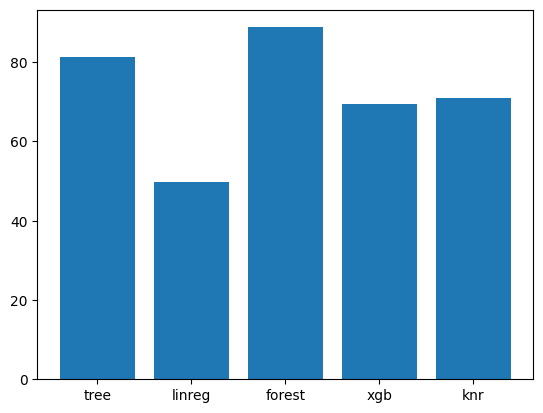

In [95]:
import matplotlib.pyplot as plt 
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

In [96]:
#From above, we can see that Random Forest performed the best,
#closely followed by Decision Tree and KNR. So we will be choosing Random Forest for the final model

In [97]:
df

,match_id,batting_team,bowling_team,overs,current_score,balls_left,wickets,crr,last_five_runs,total_score
0,2,8,3,0.1,0,299,0,0.000000,0.0,211
1,2,8,3,0.2,1,298,0,3.000000,0.0,211
2,2,8,3,0.3,1,297,0,2.000000,0.0,211
3,2,8,3,0.4,1,296,0,1.500000,0.0,211
4,2,8,3,0.5,1,295,0,1.200000,0.0,211
...,...,...,...,...,...,...,...,...,...,...
276739,1800,0,2,49.2,241,4,7,4.885135,0.0,255
276740,1800,0,2,49.3,245,3,7,4.949495,0.0,255
276741,1800,0,2,49.4,247,2,7,4.973154,0.0,255
276742,1800,0,2,49.5,251,1,7,5.036789,0.0,255


In [98]:
# batting_team='Afghanistan'
# bowling_team='India'
# score = score_predict(batting_team, bowling_team, over=45, current_score=235, wickets=7, last_five_runs=29)
# print(f'Predicted Score : {score} || Actual Score : 272')

In [99]:
df.head(50)


,match_id,batting_team,bowling_team,overs,current_score,balls_left,wickets,crr,last_five_runs,total_score
0,2,8,3,0.1,0,299,0,0.000000,0.0,211
1,2,8,3,0.2,1,298,0,3.000000,0.0,211
2,2,8,3,0.3,1,297,0,2.000000,0.0,211
3,2,8,3,0.4,1,296,0,1.500000,0.0,211
4,2,8,3,0.5,1,295,0,1.200000,0.0,211
5,2,8,3,0.6,1,294,0,1.000000,0.0,211
6,2,8,3,1.1,1,293,0,0.857143,0.0,211
7,2,8,3,1.2,1,292,0,0.750000,0.0,211
8,2,8,3,1.3,1,291,0,0.666667,0.0,211
9,2,8,3,1.4,1,290,0,0.600000,0.0,211


In [100]:
#            Team  Encoded
# 0     Australia        1
# 1         India        4
# 2    Bangladesh        2
# 3   New Zealand        6
# 4  South Africa        8
# 5       England        3
# 6   Afghanistan        0
# 7      Pakistan        7
# 8     Sri Lanka        9
# 9   Netherlands        5

In [101]:
forest.predict([[4,6,43,327,42,2,7.55,52]])

array([388.92])

In [110]:
# df

In [ ]:
forest.predict([[4,6,43,327,42,2,7.55,52]])

In [ ]:
#            Team  Encoded
# 0     Australia        1
# 1         India        4
# 2    Bangladesh        2
# 3   New Zealand        6
# 4  South Africa        8
# 5       England        3
# 6   Afghanistan        0
# 7      Pakistan        7
# 8     Sri Lanka        9
# 9   Netherlands        5


In [113]:
forest.predict([[3,6,10,51,240,1,5.1,23]])

array([283.19666667])

In [178]:
import pickle

pickle.dump(forest, open('model.pkl', 'wb'))